# Customer Churn Via DecisionTree 
## _objectives:_
 - Import Data
 - Clean for Fitting Model
 - Visualize & Interpret DecisionTree 
 - Identify Primary Variables For Churn
 - Suggest solutions for Customer Churn

## <ins>Churn</ins>-
 _the rate at which customers stop doing business with a company over a given period of time_

In [45]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns

In [46]:
#Loading in Bank Churn Dataset
df = pd.read_csv('Customer-Churn-Records.csv')

In [47]:
#intital view of dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [48]:
#Check Dtypes, Null values, and Column Names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [49]:
#Split Dataset for train tes
X = df.drop(['Exited', 'RowNumber'], axis=1)
y = df['Exited']

In [50]:
#Change object types to catgorical for machine learning functionality
X['Surname'] = X['Surname'].astype('category')
X['Geography'] = X['Geography'].astype('category')
X['Gender'] = X['Gender'].astype('category')
X['Card Type'] = X['Card Type'].astype('category')

In [51]:
#Ensuring Dtype change implementaton
X.dtypes

CustomerId               int64
Surname               category
CreditScore              int64
Geography             category
Gender                category
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Complain                 int64
Satisfaction Score       int64
Card Type             category
Point Earned             int64
dtype: object

In [52]:
#Create dummies for categorical variables
X_dummies = pd.get_dummies(X, columns=['Geography', 'Gender', 'Card Type'])
#Drop Surname as it creates too many dummies, and does litle to help DecisionTree
X = X_dummies.drop(['Surname'], axis=1)

## DecisionTrees
DecisionTrees use the probability of variables to identify outcomes based on like datapoints. We are creating two version of our Tree, one with scaled data and one without. The scaled version provides more accurate decisions, while the unscaled can proved us with real world figures. We made sure to clean and remove data prior to model fitting, so once we visualize our tree we should begin to have a clearer understanding as to why customers do or do not leave our bank

In [53]:
#Instantiation of a scaled & unscaled DecisionTree
clf = tree.DecisionTreeClassifier(max_depth=4)
clf_scaled = tree.DecisionTreeClassifier(max_depth=4)

In [54]:
#Train test splits (Scaled & Unscaled)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [55]:
#DecisionTree Fit (Scaled & Unscaled)
clf.fit(X_train, y_train)
clf_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4)

In [56]:
#SCALED DATA  DecisionTree accuracy score
clf.score(X_test, y_test)

0.998

In [57]:
#UNSCALED DATA DecisionTree accuracy score
clf_scaled.score(X_test_scaled,y_test)

0.9984

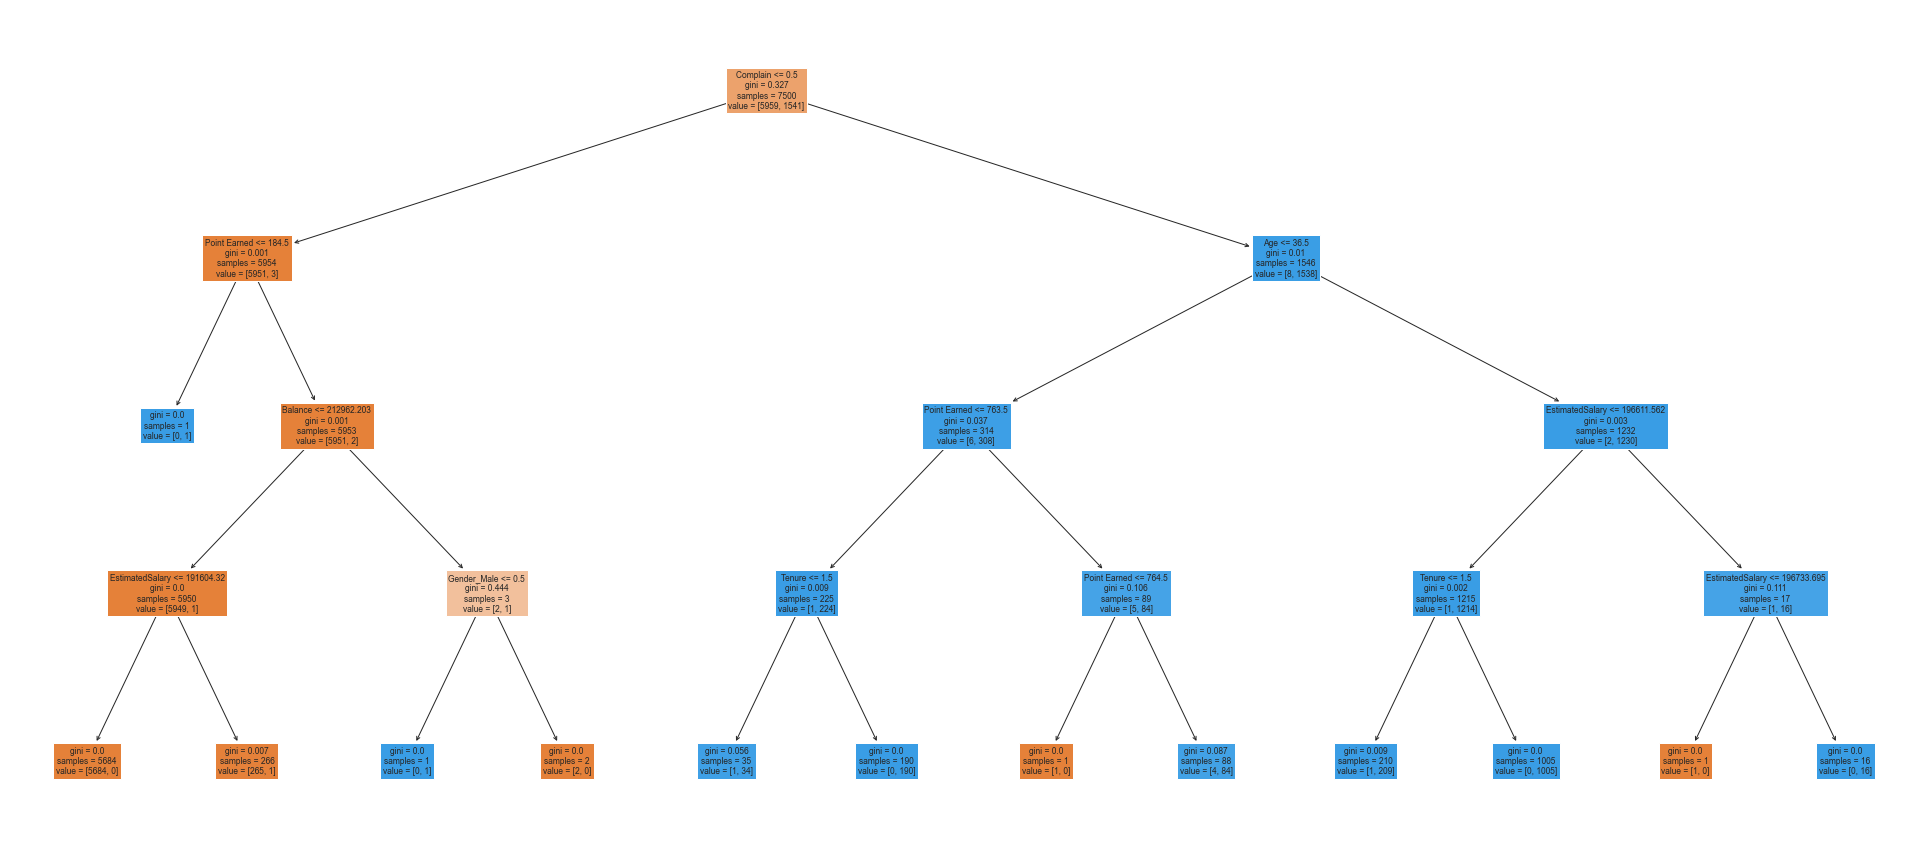

In [58]:
#Visualized DecisionTree (UNSCALED DATA) 
plt.figure(figsize=(27,12))
tree.plot_tree(clf, feature_names=X_train.columns,filled=True)
plt.tight_layout()
plt.show()

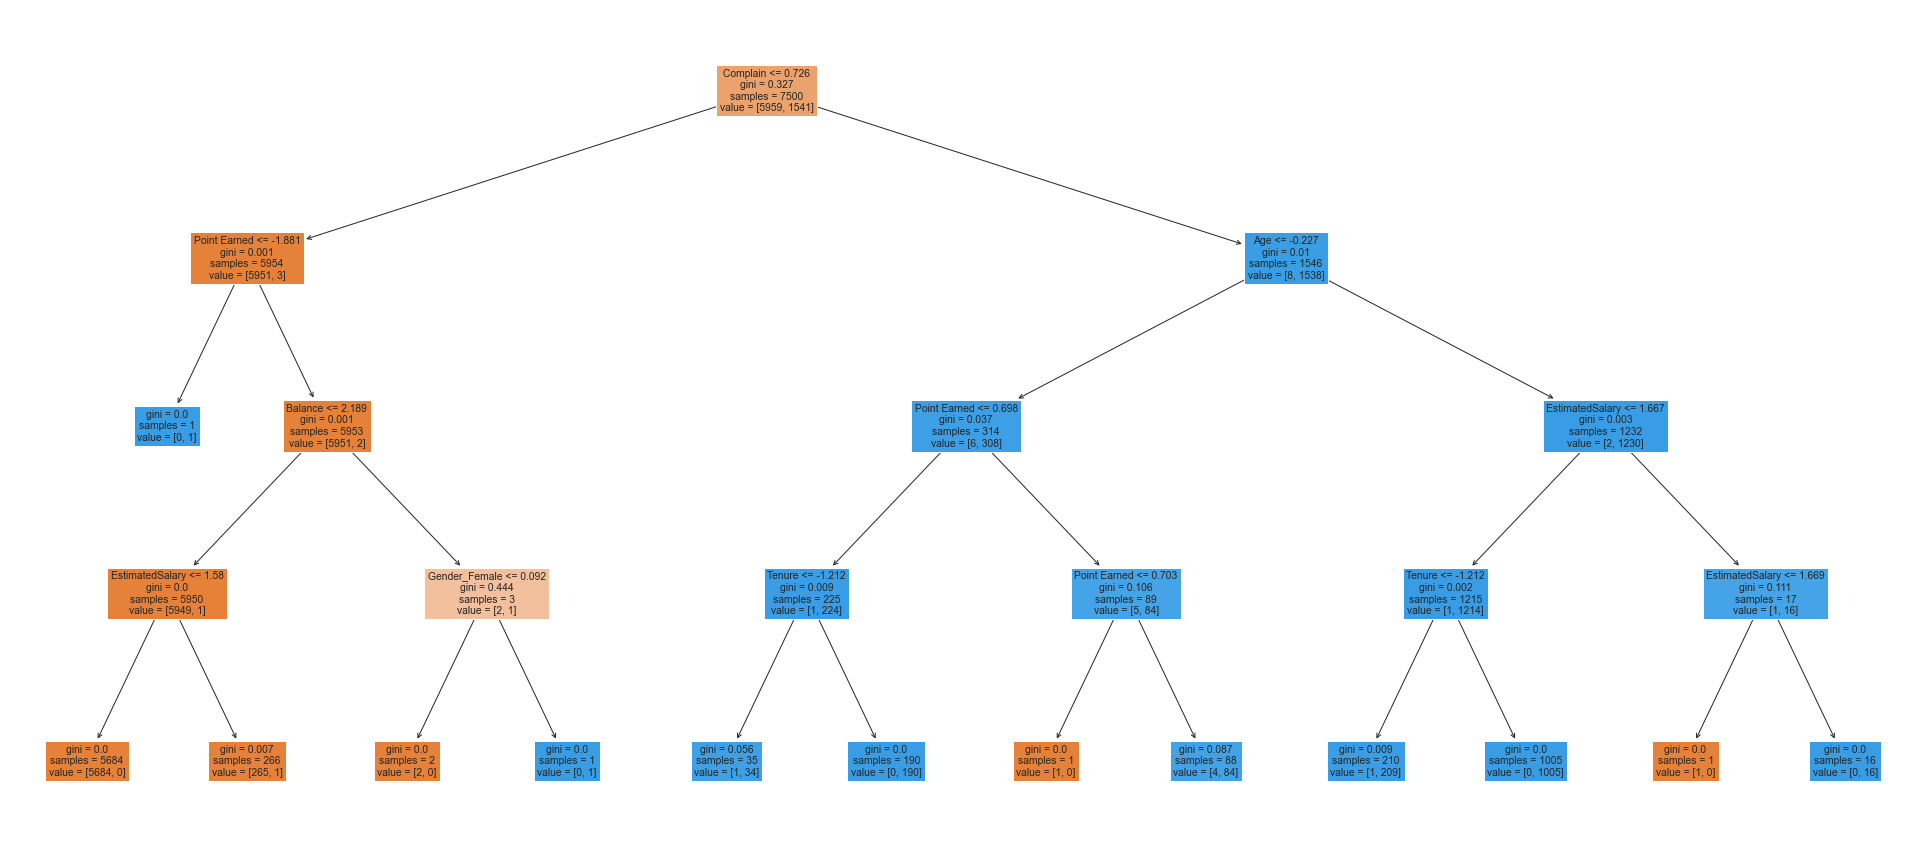

In [59]:
#Visualized Decision Tree (SCALED DATA)
plt.figure(figsize=(27,12))
tree.plot_tree(clf_scaled, feature_names=X_train.columns,filled=True)
plt.tight_layout()
plt.show()

## Feature Importance
After creating and visualizing our tree, we can begin to identify how the tree made it's decisions for new branches. This is one of our most important steps, as it can verify how we should approach fixing the churn rate issue. Our DecisionTree comes with a built in method for identifying feature importance which can be very handy, but we will also impement other Feature finders like PCA to cross examine our Tree's findings.

In [60]:
#Variable for feature Importance When Creating Scaled DecisionTree
feature_importances = clf_scaled.feature_importances_
feature_importances

array([0.00000000e+00, 0.00000000e+00, 6.28281939e-05, 2.30502332e-05,
       2.73349949e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.22250261e-04, 9.96570286e-01, 0.00000000e+00, 1.70070809e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.47527535e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

<AxesSubplot:>

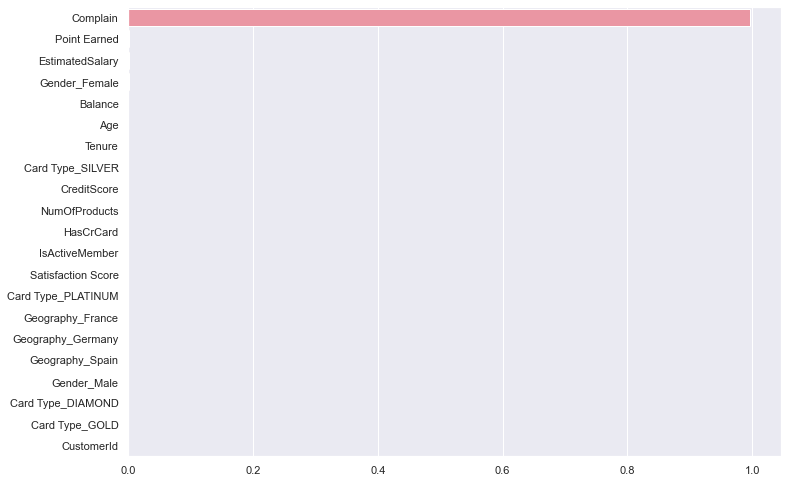

In [61]:
#Sorting for easier plotting visualization
indices = feature_importances.argsort()[::-1]
feature_names = X_train.columns[indices]
importances = feature_importances[indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=importances, y=feature_names)

# PCA
Principal Componenet Analysis is another tool to help us find feature importance, by calcuating the variability each sample and column has on the dataset & compressing dimensions for easy viewing. Our feature importance didn't really tell us much since Complaints had so much sway on the choice to exit the bank or not. PCA can tell us where our other variables contribute as features when the Decision Tree creates its new branches. If our Decision Tree did well, it should align pretty closely to the loading scores we will generate soon.

In [62]:
#Instantiation of PCA
pca = PCA()
X_train_pca=pca.fit_transform(X_train_scaled)

In [63]:
#Principal Components' Variation
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, (len(per_var)+1))]

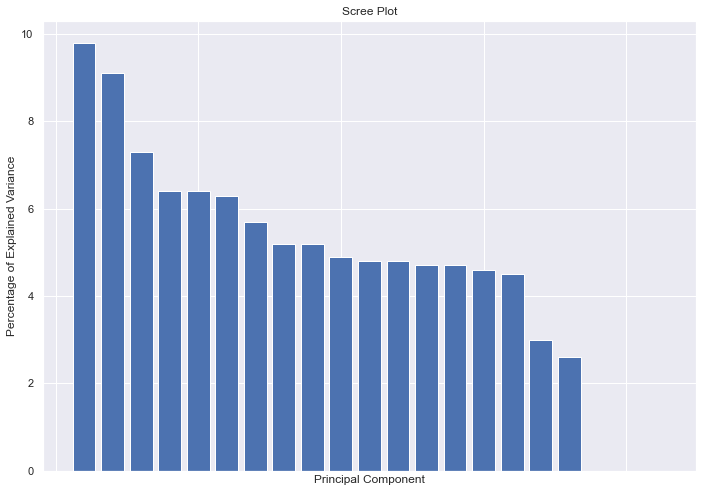

<Figure size 842.4x595.44 with 0 Axes>

In [64]:
#PCA Scree Plot Visualization
plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(axis='x', which = 'both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()
plt.clf()

In [67]:
#Variable Importance in PC1 as signified by Loading Scores
loading_scores = pd.Series(pca.components_[0], index=X_train.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(f'Variable importance ranked 1-20:', sorted_loading_scores[:20])

Variable importance ranked 1-20: Gender_Male           0.635391
Gender_Female         0.635391
Complain              0.250608
Geography_Germany     0.226514
Balance               0.155625
Geography_France      0.148253
Age                   0.119022
IsActiveMember        0.065768
Card Type_GOLD        0.064549
Geography_Spain       0.055408
Card Type_DIAMOND     0.051797
NumOfProducts         0.041388
EstimatedSalary       0.027564
Tenure                0.025781
Point Earned          0.014763
Satisfaction Score    0.014581
Card Type_PLATINUM    0.010968
CustomerId            0.009594
HasCrCard             0.007089
Card Type_SILVER      0.001625
dtype: float64


# Conclusions
 - Our loading scores give a bit more insight into how our DecisionTree was modeled. Obviously Complain remained high on the list, but gender had the highest variability onto our dataset. Female customers had a higher tendency to leave the company than men. Perhaps the company falls short on accomodating to female patrons, or they simply are not marketed to enough. 
 - Based on our decison tree model we might conclude that our bank is lacking in customer service. Complaints are not being handled properly which can cause frustration among customers, especially when we handle their money. The less a customer has in their account the less tolerant they seem to be towards the bank. 
 - This may have to do with our card rewards system. Clearly, our highly regarded customers seem to enjoy the perks/benefits these cards come with as we see in the Card Type_GOLD loading score. I might suggest broadening the rewards program to some smaller accounts. Creating a personal relationship can go a long way in customer retention, and rewarding all of our customers would incentivise loyalty to more fickle customers.

In [66]:
df['Complain'].value_counts()

0    7956
1    2044
Name: Complain, dtype: int64